In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# change plot style for matplotlib
sns.set(style="whitegrid")

# change fontstyle to times new roman
plt.rcParams['font.family'] = 'Times New Roman'


In [3]:
# defining arrays for x and y values

I = np.array([0.25,0.50,0.75,1.0,1.25,1.50,2.0,2.50,3.0,3.5,4.0])
H = np.array([0.22,0.411,0.615,0.821,1.035,1.244,1.677,2.10,2.51,2.92,3.31])
MR= np.array([2.105,2.63,3.15,4.21,5.26,6.316,8.947,12.63,16.84,21.05,26.32])

In [10]:
# fit MR vs H to quadratic function in scipy
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x**2 + b
def func2(x, a, b):
    return a*x + b

H = 0.833 I + -0.001


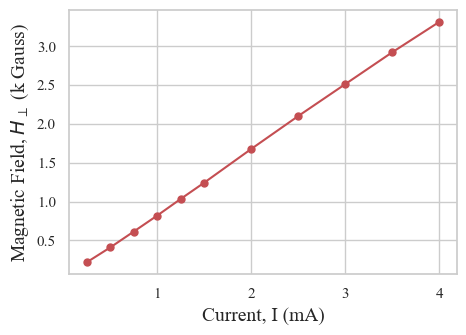

In [12]:
# plot in seaborn
# sns.set(style="whitegrid")
# sns.set_context("poster")
# sns.set_style("ticks")

# fig, ax = plt.subplots(1,1,figsize=(5,3.5), dpi=100)
# sns.lineplot(x=I,y=H,color="red", marker='.', linewidth=2.0, ax=ax)


plt.figure(figsize=(5,3.5), dpi=100)
plt.plot(I,H,'r', marker='.', ms=10, label='H')
plt.xlabel('Current, I (mA)', fontsize=14)
plt.ylabel('Magnetic Field, $H_\perp$ (k Gauss)', fontsize=14)

# fit MR vs H to linear function in scipy
popt, pcov = curve_fit(func2, I, H)
# print the equation of line
print('H = %5.3f I + %5.3f' % (popt[0], popt[1]))

# plt.savefig('H_vs_I.jpg', dpi=200, bbox_inches='tight')

In [13]:
p_opt, p_cov = curve_fit(func, H, MR)
p_opt1,p_cov1= curve_fit(func2, np.log10(H)[2:], np.log10(MR)[2:])

# print parameters
print("Qudratic fit:")
print('a =', p_opt[0])
print('b =', p_opt[1])

print("\nLinear fit:")
print('a =', p_opt1[0])
print('b =', p_opt1[1])

# get values for x-axis
x_plot = np.linspace(0.2,3.5,100)
y_fit = func(x_plot, p_opt[0], p_opt[1])
y_fit_log = func2(np.log10(x_plot), p_opt1[0], p_opt1[1])

# calculate goodness of fit
from scipy.stats import chisquare
chisq = chisquare(MR, func(H, p_opt[0], p_opt[1]))
# chisq_log = chisquare(MR, func2(np.log10(H), p_opt1[0], p_opt1[1]))

# print goodness of fit
print("\nGoodness of fit:")
print('chisq =', chisq[0])
# print('chisq_log =', chisq_log[0])



Qudratic fit:
a = 2.1942269633997524
b = 2.5914342640483303

Linear fit:
a = 1.2616773089729467
b = 0.7184265608245763

Goodness of fit:
chisq = 0.26442181984785507


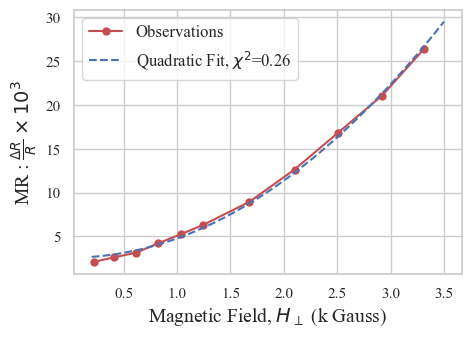

In [14]:
# plotting H vs MR
plt.figure(figsize=(5,3.5), dpi=100)
plt.plot(H,MR,'r', marker='.', ms=10, label='Observations')
plt.plot(x_plot,y_fit,'b', ls='--', label='Quadratic Fit, $\\chi^2$=%2.2f' %chisq[0])
plt.xlabel('Magnetic Field, $H_\perp$ (k Gauss)', fontsize=14)
plt.ylabel('MR : $\\frac{\\Delta R}{R} \\times 10^3$', fontsize=14)

plt.legend(loc='best', fontsize=12)
plt.savefig('H_vs_MR.jpg', dpi=300, bbox_inches='tight')

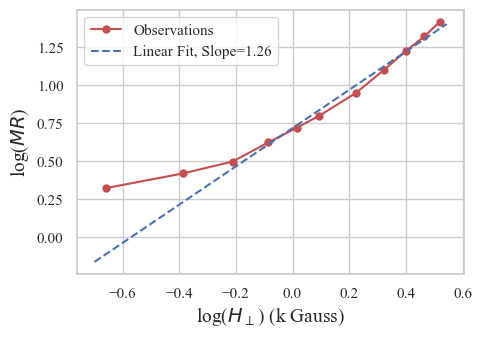

In [15]:
# loglog plot
plt.figure(figsize=(5,3.5), dpi=100)
plt.plot(np.log10(H), np.log10(MR) ,'r', marker='.', ms=10, label='Observations')

# add the linear fit
plt.plot(np.log10(x_plot),y_fit_log,'b', ls='--', label='Linear Fit, Slope=%2.2f' %p_opt1[0])

plt.xlabel('log($H_\perp$) (k Gauss)', fontsize=14)
plt.ylabel('log($MR$)', fontsize=14)

plt.legend()
# plt.plot(x_plot,y_fit,'b', ls='--', label='Quadratic Fit')

plt.savefig('H_vs_MR_log.jpg', dpi=300, bbox_inches='tight')